In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df0 = pd.read_csv('Kenntnisse und Einstellungen im Finanzbereich.csv')
df0.drop(columns='Timestamp',inplace=True)
df1 = pd.read_csv('Attitudes and Knowledge Regarding Finance.csv')
df1.drop(columns='Timestamp',inplace=True)

In [2]:
df0.columns

Index(['Alter', 'Geschlecht', 'Nationalität',
       'Was entspricht Ihrer zuletzt abgeschlossenen Ausbildung?',
       'Was entspricht Ihrer aktuellen primären Tätigkeit?',
       'Wie hoch ist Ihr ungefähres Jahreseinkommen?',
       'Sind Sie aktuell in Wertschriften wie Aktien, Obligation, Anlagefonds oder ETFs investiert? Falls nicht, könnten Sie sich vorstellen Ihr Geld anzulegen? ',
       'In was für Anlagen sind Sie primär investiert, respektive in welche Anlagen könnten Sie sich vorstellen primär zu investieren?',
       'Ich tendiere für heute zu leben, der morgige Tag wird für das Seine sorgen.',
       'Ich bevorzuge es Geld auszugeben anstelle das Geld langfristig zu sparen.',
       'Geld ist dazu da um ausgegeben zu werden.', 'Antwort in Prozent:',
       'Mögliche Antworten', 'Antwort in CHF', 'Mögliche Antworten.1',
       'Mögliche Antworten.2', 'Mögliche Antworten.3', 'Mögliche Antworten.4'],
      dtype='object')

In [3]:
mapper = list(['age','gender','nationality','education','employment','income','invested','inv_pref','att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7'])
df0.columns = mapper
df1.columns = mapper
comb = [df0, df1]
df = pd.concat(comb,ignore_index=True)

In [4]:
df.age.describe()

count    107.000000
mean      31.785047
std       13.561897
min       19.000000
25%       23.500000
50%       27.000000
75%       32.500000
max       79.000000
Name: age, dtype: float64

In [5]:
df.drop(columns='nationality',inplace=True)

In [6]:
df.age = df.age.apply(lambda x: 0 if x < 25 else(1 if x < 35 else(2 if x < 50 else(3 if x < 65 else 4))))

df.gender = df.gender.apply(lambda x: 0 if x == 'Mann' or x == 'Male' else 1)

df.education = df.education.apply(lambda x: 0 if x == 'Berufslehre / Matura' or \
                                  x == 'High School / Apprenticeship / Secondary Education' \
                                  else(1 if x == 'Höhere Fachschule' or x == 'Technical College' \
                                       else(2 if x == 'Bachelor (Uni/FH)' or x == "Bachelor's degree" \
                                            else(3 if x == 'Master (Uni/FH)' or x == "Master's degree" else 0))))

df.employment = df.employment.apply(lambda x: 0 if x == 'Ausblidung / Student' or x == 'Student' \
                                    else(1 if x == 'Arbeitstätig' or x == 'Employed' \
                                         else(2 if x == 'Nicht erwerbstätig / Pensioniert / Andere' \
                                              or x == 'Not in the workforce / retired / other' else 3)))

df.income = df.income.apply(lambda x: 0 if x == "CHF 0 - CHF 30'000" or x == "USD 0 - USD 30'000" \
                            else(1 if x == "CHF 30'001 - CHF 50'000" or x == "USD 30'001 - USD 50'000" \
                                 else(2 if x == "CHF 50'001 - CHF 65'000" or x == "USD 50'000 - USD 65'000" \
                                      else(3 if x == "CHF 65'001 - CHF CHF 80'000" \
                                           or x == "USD 65'001 - USD 80'000" \
                                           else(4 if x == "CHF 80'001 - CHF 100'000" or \
                                                x == "USD 80'001 - USD 100'000" else 5)))))

df.invested = df.invested.apply(lambda x: 0 if x == 'Nein' or x == 'No' else 1)

df.inv_pref = df.inv_pref.apply(lambda x: 0 if x == "Weiss nciht" or x == "Do not know" \
                                        else(1 if x == "ETF" or x == "ETFs" \
                                             else(2 if x == "Einzeltitel wie Aktien, Obligationen oder ein Mix (ohne Anlagefonds)" \
                                                  or x == "single securities such as stocks, bonds or a mix (excluding funds)" \
                                                  else(3 if x == "Anlagefonds" or x == "investment funds" else 4))))

df.fink1 = df.fink1.apply(lambda x: 1 if x == 2 else 0)
df.fink2 = df.fink2.apply(lambda x: 1 if x == 'Fahrrad CHF 980' or x == 'Bicycle USD 980' else 0)
df.fink3 = df.fink3.apply(lambda x: 1 if x == 102 or x == 2 else 0)
df.fink4 = df.fink4.apply(lambda x: 1 if x == 'Ja' or x == 'Yes' else 0)
df.fink5 = df.fink5.apply(lambda x: 1 if x == 'Ja' or x ==  'Yes' else 0)
df.fink6 = df.fink6.apply(lambda x: 1 if x == 'Ja' or x == 'Yes' else 0)
df.fink7 = df.fink7.apply(lambda x: 1 if x == 'Merh asl CHF 110' or x == 'More than USD 110' else 0)

In [7]:
df

,age,gender,education,employment,income,invested,inv_pref,att1,att2,att3,fink1,fink2,fink3,fink4,fink5,fink6,fink7
0,1,0,2,3,1,1,1,3,2,3.0,0,1,1,1,1,1,0
1,0,1,2,3,0,0,4,3,2,3.0,0,0,1,1,1,1,0
2,0,0,3,3,0,1,1,4,4,3.0,0,1,1,1,1,1,0
3,1,0,1,1,5,1,2,2,3,3.0,0,1,1,1,1,1,0
4,1,0,2,3,0,1,2,2,3,4.0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,0,2,0,0,1,2,4,4,3.0,0,1,1,1,1,1,0
103,1,1,2,1,2,1,2,3,3,3.0,0,0,0,1,0,0,0
104,1,1,2,0,0,1,3,4,3,1.0,0,1,1,1,1,1,1
105,1,1,1,1,1,1,2,2,2,NaN,0,0,0,1,1,0,0


In [8]:
df.isna().sum()

age           0
gender        0
education     0
employment    0
income        0
invested      0
inv_pref      0
att1          0
att2          0
att3          1
fink1         0
fink2         0
fink3         0
fink4         0
fink5         0
fink6         0
fink7         0
dtype: int64

In [9]:
df.shape

(107, 17)

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.att3 = df.att3.astype(int)

In [11]:
# cleaned dataset
df

,age,gender,education,employment,income,invested,inv_pref,att1,att2,att3,fink1,fink2,fink3,fink4,fink5,fink6,fink7
0,1,0,2,3,1,1,1,3,2,3,0,1,1,1,1,1,0
1,0,1,2,3,0,0,4,3,2,3,0,0,1,1,1,1,0
2,0,0,3,3,0,1,1,4,4,3,0,1,1,1,1,1,0
3,1,0,1,1,5,1,2,2,3,3,0,1,1,1,1,1,0
4,1,0,2,3,0,1,2,2,3,4,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,1,2,1,1,1,1,2,2,2,0,1,0,0,1,0,0
102,1,0,2,0,0,1,2,4,4,3,0,1,1,1,1,1,0
103,1,1,2,1,2,1,2,3,3,3,0,0,0,1,0,0,0
104,1,1,2,0,0,1,3,4,3,1,0,1,1,1,1,1,1


In [12]:
X = df
X = X.drop(columns=['invested'])
X['fink']= X[['fink1','fink2','fink3','fink4','fink5','fink6','fink7']].sum(axis=1)
X['att'] = X[['att1','att2','att3']].sum(axis=1)
Y = df[['invested','inv_pref']]

In [13]:
genvars = X.drop(columns=['fink','att','att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7','inv_pref'])

In [14]:
genvars.head(3)

,age,gender,education,employment,income
0,1,0,2,3,1
1,0,1,2,3,0
2,0,0,3,3,0


In [15]:
mu_age = np.array(genvars.age.value_counts(normalize=True))
mu_gender = np.array(genvars.gender.value_counts(normalize=True))
mu_education = np.array(genvars.education.value_counts(normalize=True))
mu_employment = np.array(genvars.employment.value_counts(normalize=True))
mu_income = np.array(genvars.income.value_counts(normalize=True))
#mu_inv = np.array(genvars.invested.value_counts(normalize=True))
#mu_inv_pref = np.array(genvars.inv_pref.value_counts(normalize=True))

mu = {}

mu = {'age':mu_age, 'gender':mu_gender, 'education':mu_education, 'employment':mu_employment, 'income':mu_income}

In [16]:
mu

{'age': array([0.48113208, 0.29245283, 0.13207547, 0.06603774, 0.02830189]),
 'gender': array([0.51886792, 0.48113208]),
 'education': array([0.39622642, 0.36792453, 0.16981132, 0.06603774]),
 'employment': array([0.47169811, 0.26415094, 0.20754717, 0.05660377]),
 'income': array([0.48113208, 0.18867925, 0.09433962, 0.09433962, 0.0754717 ,
        0.06603774])}

In [17]:
# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40
age_beta4 = 0.20

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3,age_beta4],
                    [age_beta1,age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta2,age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta3,age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta4,age_beta3,age_beta2,age_beta1,age_alpha0]])

# education
edu_alpha0 = 0.85
edu_beta1 = 0.70
edu_beta2 = 0.55
edu_beta3 = 0.40

aff_edu = np.array([[edu_alpha0,edu_beta1,edu_beta2,edu_beta3],
                    [edu_beta1,edu_alpha0,edu_beta1,edu_beta2],
                    [edu_beta2,edu_beta1,edu_alpha0,edu_beta1],
                    [edu_beta3,edu_beta2,edu_beta1,edu_alpha0]])

# employment
emp_alpha0 = 0.90 # self
emp_beta_wf = 0.75 # beta workforce / employed / unemployed vs student
emp_beta_ret = 0.70 # beta retired vs workforce
emp_beta_sr = 0.20 # gen gap student / retired

aff_emp = np.array([[emp_alpha0,emp_beta_wf,emp_beta_sr,emp_beta_wf],
                    [emp_beta_wf,emp_alpha0,emp_beta_ret,emp_beta_wf],
                    [emp_beta_sr,emp_beta_ret,emp_alpha0,emp_beta_ret],
                    [emp_beta_wf,emp_beta_wf,emp_beta_ret,emp_alpha0]])

# income
inc_alpha0 = 0.85
inc_beta1 = 0.70
inc_beta2 = 0.60
inc_beta3 = 0.50
inc_beta4 = 0.40
inc_beta5 = 0.25

aff_inc = np.array([[inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4,inc_beta5],
                    [inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4],
                    [inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3],
                    [inc_beta3,inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2],
                    [inc_beta4,inc_beta3,inc_beta2,inc_beta2,inc_alpha0,inc_beta1],
                    [inc_beta5,inc_beta4,inc_beta3,inc_beta2,inc_beta1,inc_alpha0]])

# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])


# invested

inv_alpha0 = 0.95
inv_beta1 = 0.50

aff_inv = np.array([[inv_alpha0,inv_beta1],
                    [inv_beta1,inv_alpha0]])

# inv_pref
inv_pref_alpha0 = 0.95 # same
inv_pref_other = 0.80 # other class
inv_pref_noninv = 0.50 # not invested
inv_pref_notknow = 0.70 # not know with investment cats and not invested

aff_inv_pref = np.array([[inv_pref_alpha0,inv_pref_noninv,inv_pref_noninv,inv_pref_noninv,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_alpha0,inv_pref_other,inv_pref_other,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_other,inv_pref_alpha0,inv_pref_other,inv_pref_notknow],
                         [inv_pref_noninv,inv_pref_other,inv_pref_other,inv_pref_alpha0,inv_pref_notknow],
                         [inv_pref_notknow,inv_pref_notknow,inv_pref_notknow,inv_pref_notknow,inv_pref_alpha0]])


aff = {}
aff = {0:aff_age, 1:aff_gend,2:aff_edu,3:aff_emp,4:aff_inc}

In [18]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [19]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [20]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

764.5

In [21]:
G = nx.from_numpy_matrix(A)

In [22]:
nx.is_connected(G)

True

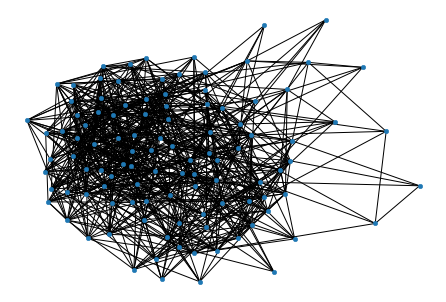

In [23]:
nx.draw(G,node_size=20)

In [24]:
features = pd.Series(Y.invested) # invested or inv_pref

In [25]:
features.unique()

array([1, 0])

In [26]:
legend = features.to_dict()

In [27]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    elif i[1] == 1:
        color_map.append('blue')
    elif i[1] == 2:
        color_map.append('yellow')
    elif i[1] == 3:
        color_map.append('pink')
    else:
        color_map.append('purple')

In [28]:
pos = nx.spring_layout(G)

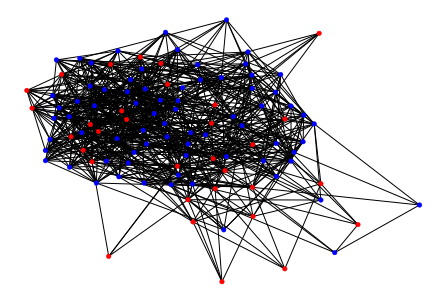

In [29]:
nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
plt.show()

In [45]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['att1','att2','att3','fink1','fink2','fink3','fink4','fink5','fink6','fink7'])

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.8)
G_dgl.ndata['label'] = torch.tensor(features)

In [46]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [47]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [48]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [49]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [50]:
model = SAGE(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
for epoch in range(150):
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    print(loss_train.item(),loss_val.item(),acc_train,acc_val)

    # Save model if necessary.  Omitted in this example.

2.750291347503662 2.5487711429595947 0.29069767441860467 0.35
1.9690449237823486 1.8751786947250366 0.26744186046511625 0.3
1.322264313697815 1.336305856704712 0.2558139534883721 0.3
0.9082899689674377 1.0130488872528076 0.46511627906976744 0.4
0.7701221108436584 0.9421544075012207 0.6395348837209303 0.6
0.8253275156021118 1.0462334156036377 0.7093023255813954 0.65
0.9396287798881531 1.1978548765182495 0.7093023255813954 0.65
1.036139726638794 1.32124924659729 0.7093023255813954 0.65
1.091995120048523 1.3939697742462158 0.7093023255813954 0.65
1.1061240434646606 1.4160462617874146 0.7093023255813954 0.65
1.0834261178970337 1.3927773237228394 0.7093023255813954 0.65
1.0308599472045898 1.332924485206604 0.7093023255813954 0.65
0.9565116763114929 1.2458784580230713 0.7093023255813954 0.65
0.869593620300293 1.1419652700424194 0.7093023255813954 0.65
0.7810516357421875 1.0332601070404053 0.7093023255813954 0.65
0.7036817073822021 0.9330997467041016 0.7325581395348837 0.65
0.6499336957931519

0.16284528374671936 0.23512783646583557 0.9767441860465116 0.9
0.16161079704761505 0.23412573337554932 0.9883720930232558 0.9
0.16039034724235535 0.23322844505310059 0.9883720930232558 0.9
0.15920306742191315 0.23243877291679382 0.9883720930232558 0.9
0.15802183747291565 0.23171424865722656 0.9883720930232558 0.9


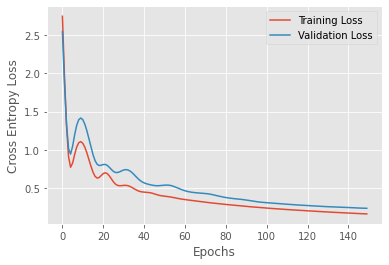

In [51]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

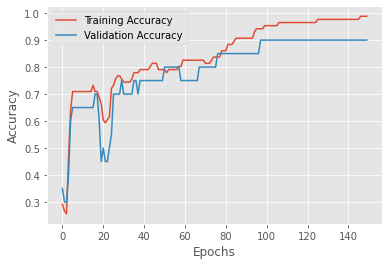

In [52]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.9
-------------------------------------------------------------
Classification Accuracy training set 0.9883720930232558
-------------------------------------------------------------
Confusion Matrix validation set:
[[ 5  2]
 [ 0 13]]
-------------------------------------------------------------
Confusion Matrix training set:
[[24  1]
 [ 0 61]]


In [60]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

roc_auc_score(val_lab,indices_val)

0.8571428571428572

In [54]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=100, walk_length=5, num_walks=100, workers=1)
model = node2vec.fit(window=5, min_count=1, batch_words=2)
model.wv.save_word2vec_format('embeddings')

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:04<00:00, 24.12it/s]


In [55]:
#t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
#t.sort_index(inplace=True)
#t = t.to_numpy()
#t.shape

In [56]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(X,features, test_size = 0.2, shuffle=True)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=150, batch_size=1)

Epoch 1/150
84/84 [==============================] - 1s 5ms/step - loss: 0.6491 - accuracy: 0.7212 - val_loss: 0.6923 - val_accuracy: 0.6364
Epoch 2/150
84/84 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6369 - val_loss: 0.6198 - val_accuracy: 0.6364
Epoch 3/150
84/84 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7332 - val_loss: 0.5165 - val_accuracy: 0.6818
Epoch 4/150
84/84 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7404 - val_loss: 0.4872 - val_accuracy: 0.7727
Epoch 5/150
84/84 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8142 - val_loss: 0.4732 - val_accuracy: 0.8182
Epoch 6/150
84/84 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8330 - val_loss: 0.4051 - val_accuracy: 0.7727
Epoch 7/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.8886 - val_loss: 0.4210 - val_accuracy: 0.8182
Epoch 8/150
8

Epoch 59/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.5050 - val_accuracy: 0.8636
Epoch 60/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9742 - val_loss: 0.3606 - val_accuracy: 0.7727
Epoch 61/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.7727
Epoch 62/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.4128 - val_accuracy: 0.8182
Epoch 63/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 0.4915 - val_accuracy: 0.8636
Epoch 64/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.3851 - val_accuracy: 0.7727
Epoch 65/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9920 - val_loss: 0.3692 - val_accuracy: 0.7727
Epoch 

84/84 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5866 - val_accuracy: 0.7727
Epoch 117/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.6173 - val_accuracy: 0.7727
Epoch 118/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6114 - val_accuracy: 0.7727
Epoch 119/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5586 - val_accuracy: 0.7727
Epoch 120/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.5582 - val_accuracy: 0.7727
Epoch 121/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.5845 - val_accuracy: 0.7727
Epoch 122/150
84/84 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5376 - val_accuracy: 0.8182
Epoch 123/150

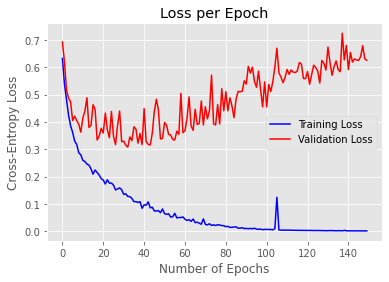

In [58]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

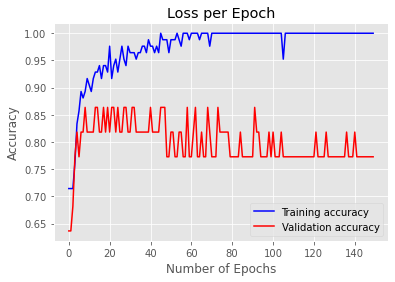

In [59]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Loss per Epoch')
plt.legend()
plt.show()